In [1]:
import networkx as nx
import pandas as pd

In [2]:
import os

## Ulsan Road Network
Data is come from http://nodelink.its.go.kr/

In [35]:
Ulsan=nx.read_graphml('ulsan2.graphml')

In [36]:
print(nx.info(Ulsan))

Name: 
Type: Graph
Number of nodes: 2752
Number of edges: 3927
Average degree:   2.8539


In [37]:
# Check Data
print(list(Ulsan.nodes(data=True))[0]) # node
print(list(Ulsan.edges(data=True))[0]) # edge

('1960006303', {'x': 129.1494859, 'y': 35.51181334, 'node_type': 101, 'node_name': '-', 'turn_p': 0, 'user_id': 'ussi', 'workstate': 5, 'dept_code': 31000, 'stnl_reg': 196, 'Component ID': 0, 'Degree': 3, 'Modularity Class': 32, 'Eccentricity': 68.0, 'Closeness Centrality': 0.02987814149488455, 'Harmonic Closeness Centrality': 0.039837361770148204, 'Betweenness Centrality': 0.0054148228744372385})
('1960006303', '1960039200', {'weight': 2.0, 'link_id': 1960091900, 'road_use': 0, 'lanes': 1, 'road_rank': 104, 'road_name': '-', 'multi_link': 0, 'connect': 0, 'max_spd': 40, 'rest_veh': 0, 'rest_w': 0, 'rest_h': 0, 'remark': '보완G_수정', 'user_id': 'nodelinkmanager', 'workstate': 5, 'dept_code': 50000, 'stnl_reg': 196, 'road_type': 0, 'road_no': '-', 'upload_id': 'nodelinkmanager2017010411', 'shape_stle': 1713.540148, 'id': '8144'})


In [38]:
section = nx.get_node_attributes(Ulsan,'stnl_reg')
gun = set(section.values())

In [39]:
gun #중구:192, 남구:193, 동구:194, 북구:195,:울주군:196

{192, 193, 194, 195, 196}

In [40]:
# restriction for ulju
selected = [n for n,v in section.items() if v==196]
ulju = Ulsan.subgraph(selected)

In [41]:
# set nodeposition
X = nx.get_node_attributes(ulju,'x')
Y = nx.get_node_attributes(ulju,'y')
pos = {i:np.array([j,k])for i,j,k in zip(selected,X.values(),Y.values())}

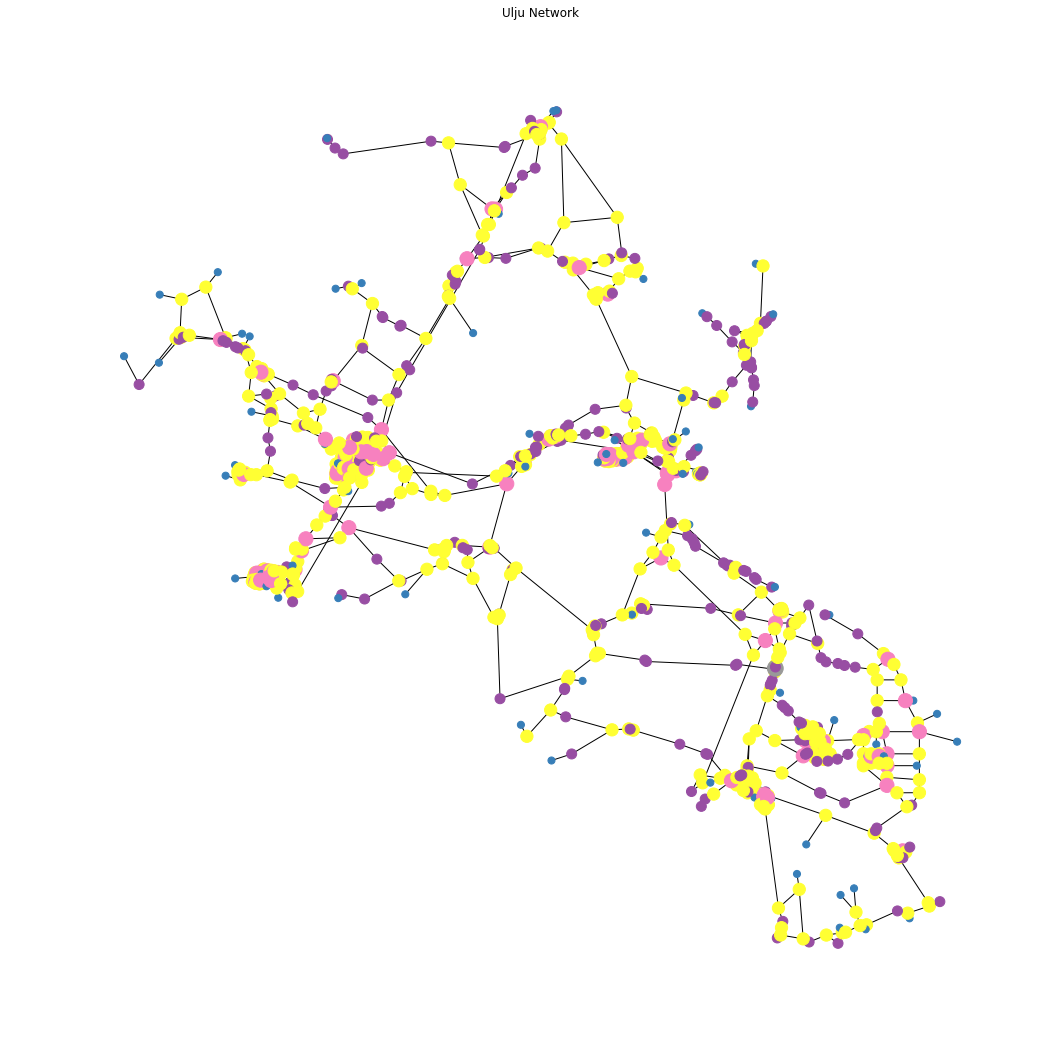

In [42]:
dig = dict(nx.degree(ulju)) # degree of network
plt.figure(figsize=(14,14)) #Control figure size
nx.draw(ulju,pos,with_labels=False
        ,node_size = [d*50 for d in dig.values()] # node size
        ,node_color=list(dig.values()) # data for label color
        ,font_size=10 # labelsize
        ,cmap=plt.cm.Set1 # color_map
        ,edge_color='k' # data for edge color
       )
plt.title('Ulju Network');
plt.savefig('Ulju.png', format="PNG") # Save figure